            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic 

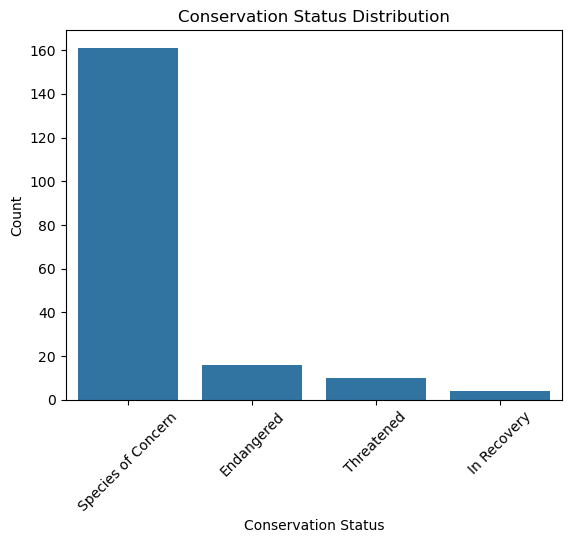

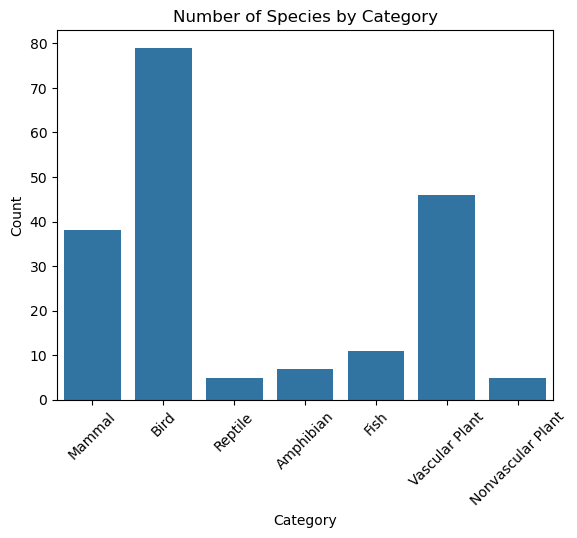

NameError: name 'df' is not defined

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df_parks = pd.read_csv('observations.csv')
df_species = pd.read_csv('species_info.csv')

# Display the first few rows of each DataFrame
print(df_parks.head())
print(df_species.head())

# Inspect the data
print(df_parks.info())
print(df_species.info())

# Cleaning the Data
# Handling missing values
df_parks.dropna(inplace=True)
df_species.dropna(inplace=True)

# Removing duplicates
df_parks.drop_duplicates(inplace=True)
df_species.drop_duplicates(inplace=True)

# Check for any remaining issues
print(df_parks.isnull().sum())
print(df_species.isnull().sum())
print(df_parks.duplicated().sum())
print(df_species.duplicated().sum())

# Exploratory Data Analysis (EDA)
# Summary Statistics for species_info.csv
print(df_species.describe())

# Distribution Plots for conservation statuses
sns.countplot(data=df_species, x='conservation_status')
plt.title('Conservation Status Distribution')
plt.xlabel('Conservation Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Bar Plot of Species by Category
sns.countplot(data=df_species, x='category')
plt.title('Number of Species by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Analysis of Species with Conservation Status
endangered_species = df_species[df['conservation_status'] == 'Endangered']
print(endangered_species[['scientific_name', 'common_names', 'category']])

# Observations Heatmap
species_pivot = df_species.pivot_table(index='scientific_name', columns='category', values='common_names', aggfunc='count').fillna(0)
plt.figure(figsize=(15, 10))
sns.heatmap(species_pivot, cmap='coolwarm', linewidths=0.5, annot=True)
plt.title('Heatmap of Species by Category')
plt.xlabel('Category')
plt.ylabel('Scientific Name')
plt.xticks(rotation=90)
plt.show()

# Observations of Species by Park
species_observations = df_parks.groupby(['park_name', 'scientific_name'])['observations'].sum().reset_index()
plt.figure(figsize=(15, 7))
sns.barplot(data=species_observations, x='park_name', y='observations', hue='scientific_name')
plt.title('Observations of Species by Park')
plt.xlabel('Park Name')
plt.ylabel('Number of Observations')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=90)
plt.show()

# Observations Distribution by Species
species_total_observations = df_parks.groupby('scientific_name')['observations'].sum().reset_index()
plt.figure(figsize=(15, 7))
sns.barplot(data=species_total_observations, x='scientific_name', y='observations')
plt.title('Total Observations by Species')
plt.xlabel('Scientific Name')
plt.ylabel('Number of Observations')
plt.xticks(rotation=90)
plt.show()

# Observations Heatmap by Park
observations_pivot = df_parks.pivot_table(index='scientific_name', columns='park_name', values='observations', aggfunc='sum').fillna(0)
plt.figure(figsize=(15, 10))
sns.heatmap(observations_pivot, cmap='coolwarm', linewidths=0.5, annot=True)
plt.title('Heatmap of Observations by Species and Park')
plt.xlabel('Park Name')
plt.ylabel('Scientific Name')
plt.xticks(rotation=90)
plt.show()
